In [213]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [214]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [215]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [216]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [217]:
y = df["Salary"]

In [218]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

In [219]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [220]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,0,1,0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,0,0,0


In [221]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [222]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [223]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [224]:
import pandas as pd

X_reduced_train_df = pd.DataFrame(X_reduced_train)
X_reduced_train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-2.495699,-0.337762,0.706392,-1.327910,-0.821824,-0.662791,-0.656765,0.036809,-0.203665,0.176135,-0.092013,0.240129,-0.003605,-0.034125,0.043280,0.102997,0.003707,0.001379,-0.006638
1,1.570741,-0.626414,3.188770,1.162120,-1.539129,-0.618155,1.390001,0.771386,0.242590,-0.572553,-0.094015,-0.055543,0.410441,0.016656,0.206437,0.012442,0.027240,-0.168109,0.120561
2,1.500092,-1.721489,-1.684486,-0.099636,1.134993,-0.353442,0.048795,-0.148548,-0.115344,0.386504,0.110695,-0.240320,0.250834,0.403523,-0.482043,-0.035190,0.055340,-0.090852,-0.011546
3,-2.494618,1.294797,-0.873011,1.381862,-1.253936,0.335756,-0.253314,0.003235,-0.218605,-0.217849,-0.111783,0.104908,-0.576274,-0.096196,0.326706,-0.265075,0.053184,0.038601,-0.026120
4,-0.365453,1.675085,0.672585,-0.886890,1.002163,-0.549679,0.053946,-0.925558,-0.246827,0.179032,0.133352,-0.238773,-0.348676,0.070349,0.341959,-0.065960,0.030820,0.048198,0.018800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,5.943195,-0.463652,-0.072332,1.003994,-0.750503,2.465431,-0.582672,-1.765661,-0.137962,-0.664642,0.092694,-0.590275,0.122021,-0.827193,-0.023291,-0.204627,0.153395,-0.055384,-0.052379
193,7.751085,8.047763,1.867270,0.645099,0.411041,1.381169,1.588800,-0.691063,-0.916165,-1.254394,-0.693020,1.585186,1.730120,0.406841,0.017572,-0.320989,-0.234280,-0.016047,-0.116517
194,-0.377251,-3.005493,-1.824646,-0.293220,1.219468,-0.890521,-0.398157,0.291397,-0.239805,-0.614880,-0.002359,-0.284684,0.390068,0.046541,0.166187,-0.066402,0.001237,0.017395,-0.000547
195,0.927889,1.355665,-0.649981,1.393126,-1.202706,0.490887,0.069790,-0.176804,-1.067253,-0.693159,-0.041186,-0.420489,-0.631094,-0.069268,-0.122481,0.177552,-0.194913,-0.043178,0.001734


In [225]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:25]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28, 98.01, 98.68, 99.18, 99.49, 99.74, 99.9 , 99.96, 99.98,
       99.99])

In [226]:
lm = LinearRegression()

In [227]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [228]:
pcr_model.intercept_

543.4834416243655

In [229]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

In [230]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [231]:
np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564976

In [232]:
df["Salary"].mean()

535.9258821292775

In [233]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, y_pred))

405.15753641499634

390.79142556822234 test tahmin hatası


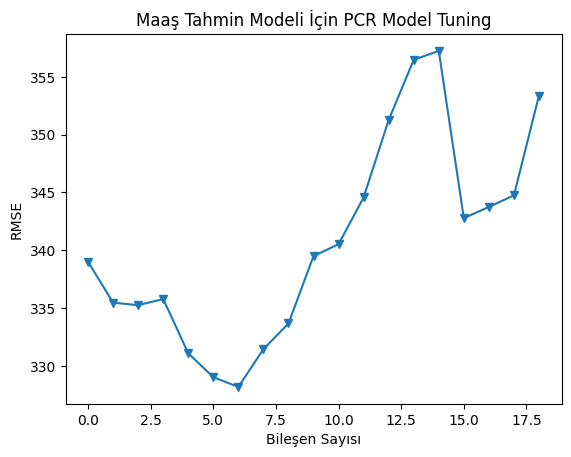

In [234]:
import matplotlib.pyplot as plt

## Model Tuning
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)),'test tahmin hatası')
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)
lm = LinearRegression()
RMSE = []
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning')
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)
y_pred = pcr_model.predict(X_reduced_train[:,0:6])


In [235]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score(y_train, y_pred)


0.5180774406506965

In [236]:
## train tahmin hatası
print(np.sqrt(mean_squared_error(y_train, y_pred)))
## Bileşen düşürüldükten sonraki tahmin hatası
y_pred = pcr_model.predict(X_reduced_test[:,0:6])
print(np.sqrt(mean_squared_error(y_test, y_pred)))


308.8265983094501
393.11987000962233
